In [1]:
import os
print(os.getcwd())

C:\Users\rossw\Documents\MAE Program\Q3\DataMining\FinalProject


In [2]:
import wikipedia
import pandas as pd

In [ ]:

sep = '\n\n\n== References =='

columns = ['title','text']
df = pd.DataFrame(columns)


for i in range(10000):
    pages = wikipedia.random(10)
    for page in pages:
        text = ''
        try:
            curPage = wikipedia.page(page)
            text = curPage.content
            title = curPage.title
        except:
            next
        
        text = text.split(sep, 1)[0]
        my_dic = pd.DataFrame({'title':title, 'text':text},index=[0])
        df = df.append(my_dic)
    if(i%100 == 0):
        print(i)

In [ ]:

#df = df.iloc[3:]
df.head()

In [ ]:
weird_char = '\xfe'
df['text'] = df['text'].str.replace('\n', weird_char)
df.to_csv('wikitextbig.csv',sep='\t')

In [3]:
weird_char = '\xfe'
new_df = pd.read_csv('wikitextbig.csv',sep='\t')
new_df.text = new_df.text.str.replace(weird_char, '\n')
new_df = new_df[['text','title']]

new_df.head()

text  \
0                                                NaN   
1  Namibia competed at the 1992 Summer Paralympic...   
2  Cody Westman is a Canadian filmmaker/musician ...   
3  Hon. Philemon Embel OBE (born 10 October 1962)...   
4  Georges Elbert Migot (27 February 1891 – 5 Jan...   

                                    title  
0                         Katherine Ellis  
1  Namibia at the 1992 Summer Paralympics  
2                            Cody Westman  
3                          Philemon Embel  
4                           Georges Migot

In [4]:
new_df = new_df.dropna()
new_df.head()

text  \
1  Namibia competed at the 1992 Summer Paralympic...   
2  Cody Westman is a Canadian filmmaker/musician ...   
3  Hon. Philemon Embel OBE (born 10 October 1962)...   
4  Georges Elbert Migot (27 February 1891 – 5 Jan...   
5  The House of Dragoș, also known as the House o...   

                                    title  
1  Namibia at the 1992 Summer Paralympics  
2                            Cody Westman  
3                          Philemon Embel  
4                           Georges Migot  
5                         House of Dragoș

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(new_df['text'])

In [6]:
from sklearn.cluster import KMeans, MiniBatchKMeans

kmeans = KMeans(n_clusters=100, random_state=0).fit(X)
#kmeans = MiniBatchKMeans(n_clusters=100, random_state=0).fit(X)

In [ ]:
#import numpy as np
#new_df[kmeans.labels_ == 4]
#new_df[np.where(kmeans.labels_ == 4)]


In [ ]:
new_df[kmeans.labels_ == 4]['title']

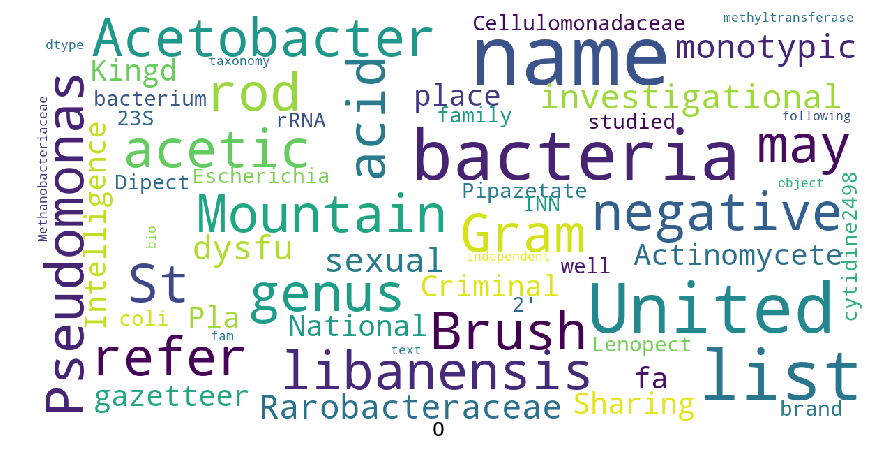

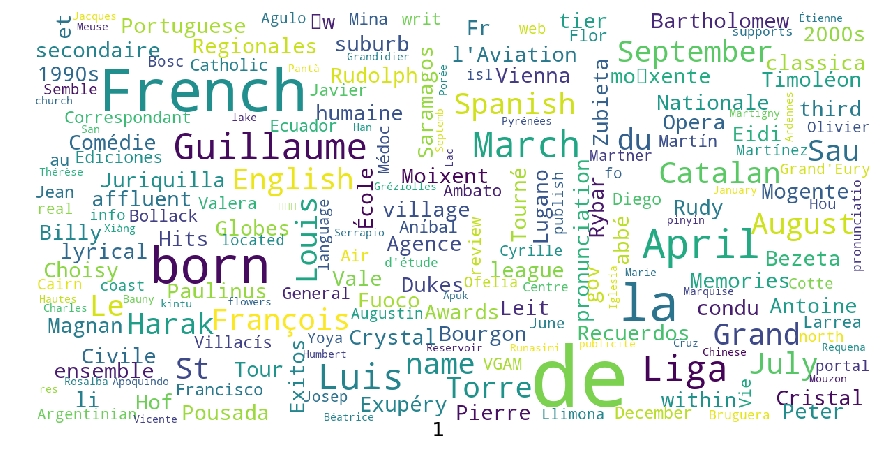

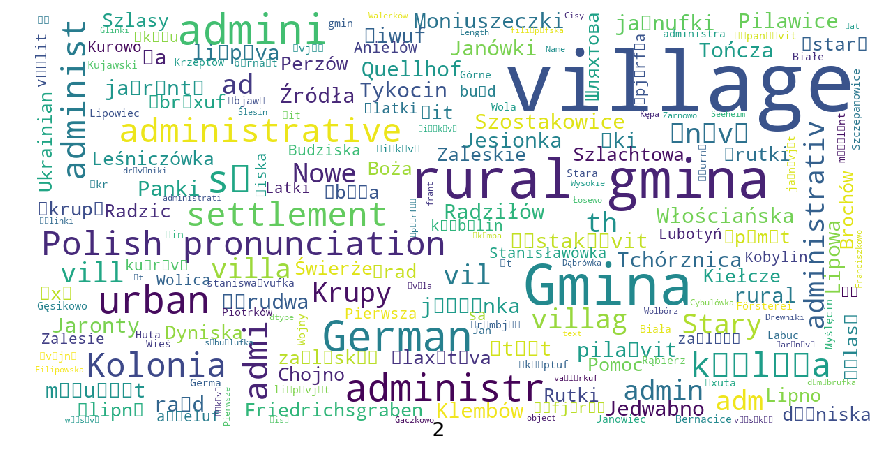

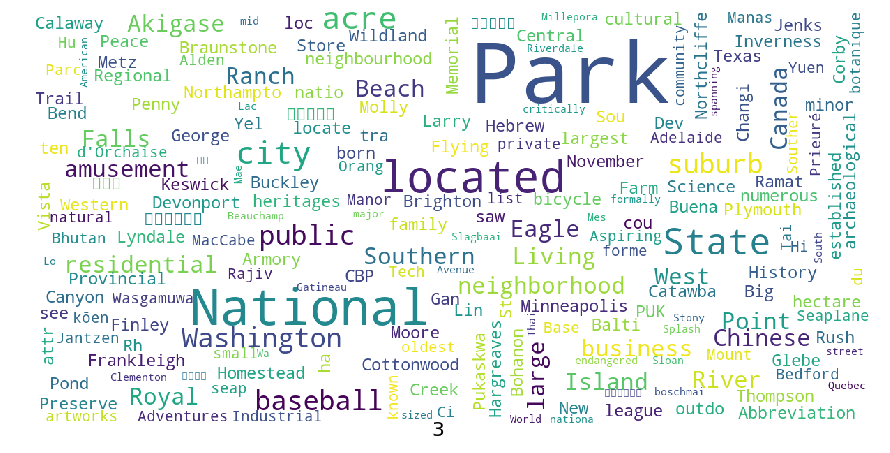

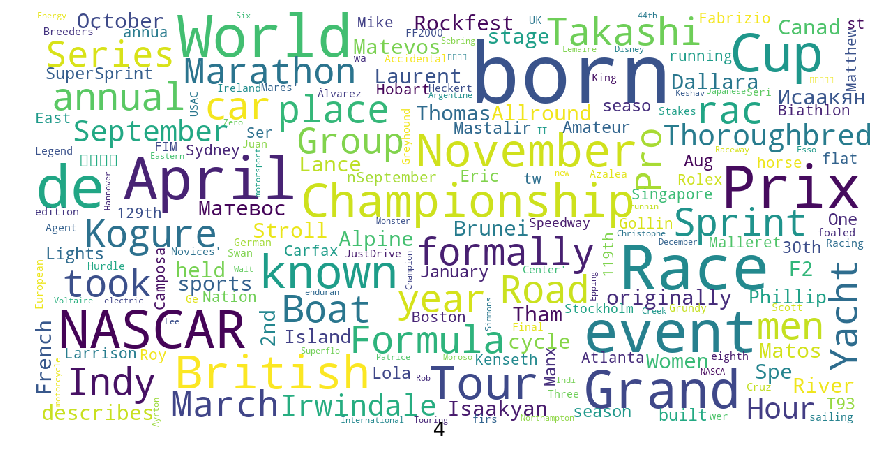

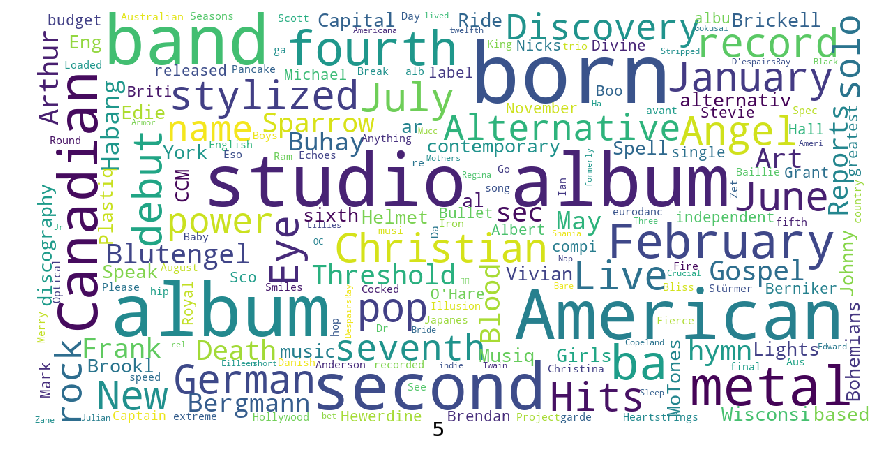

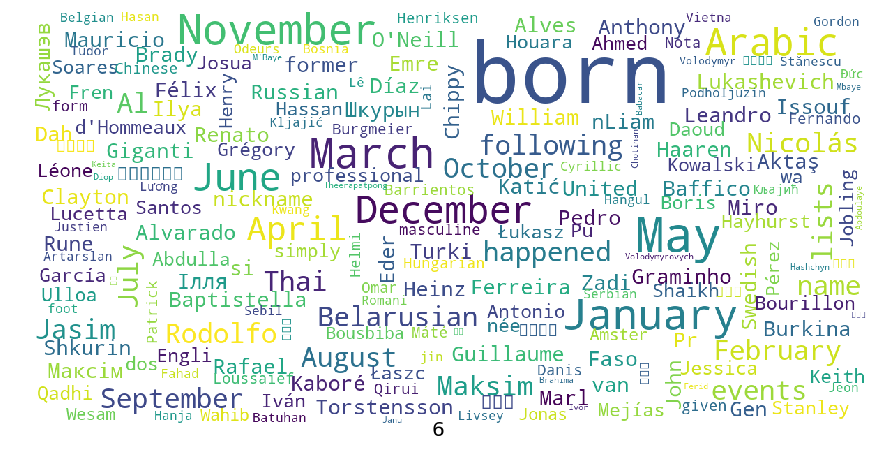

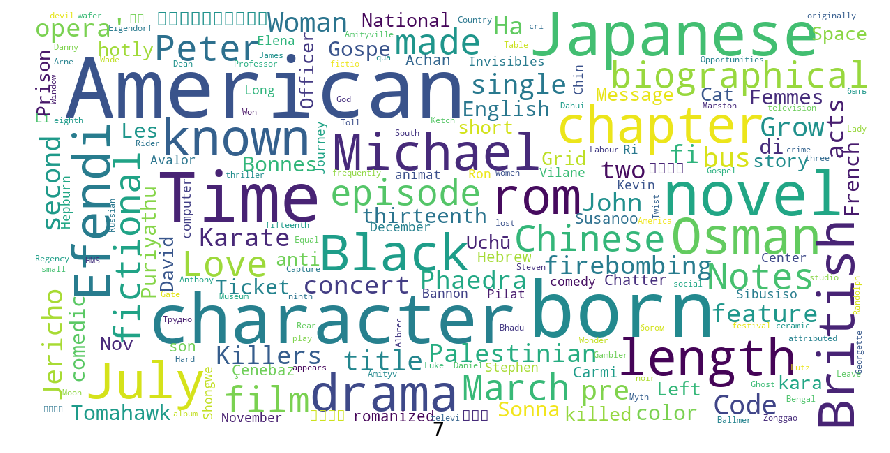

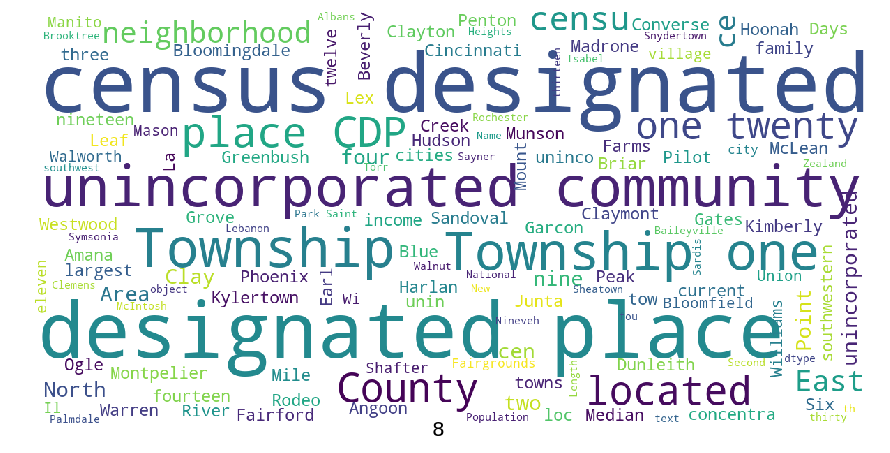

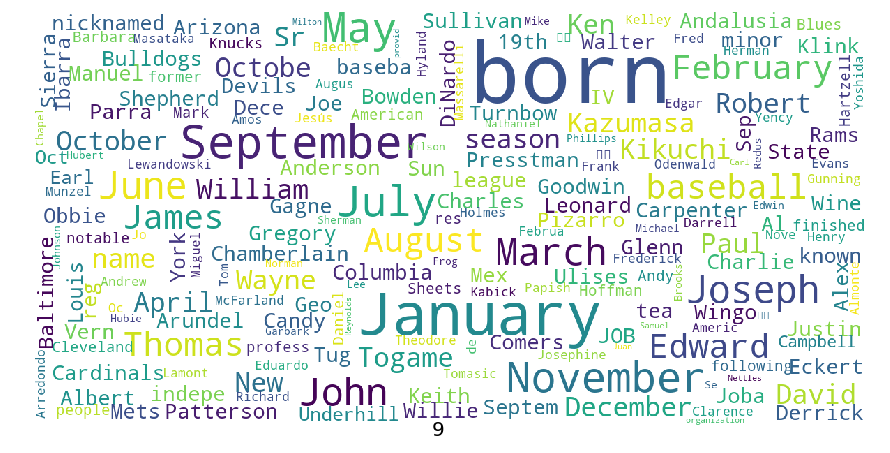

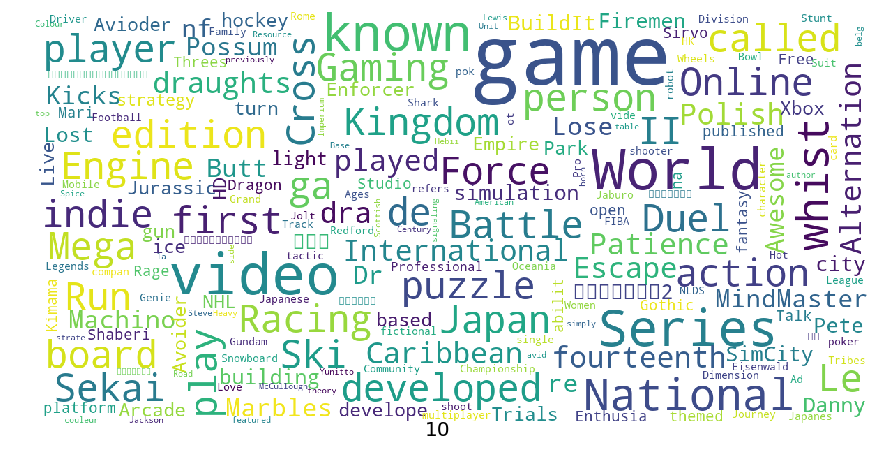

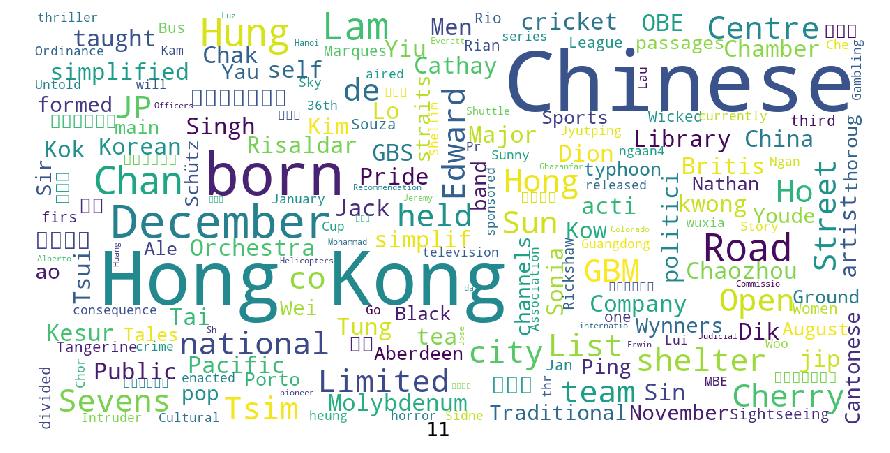

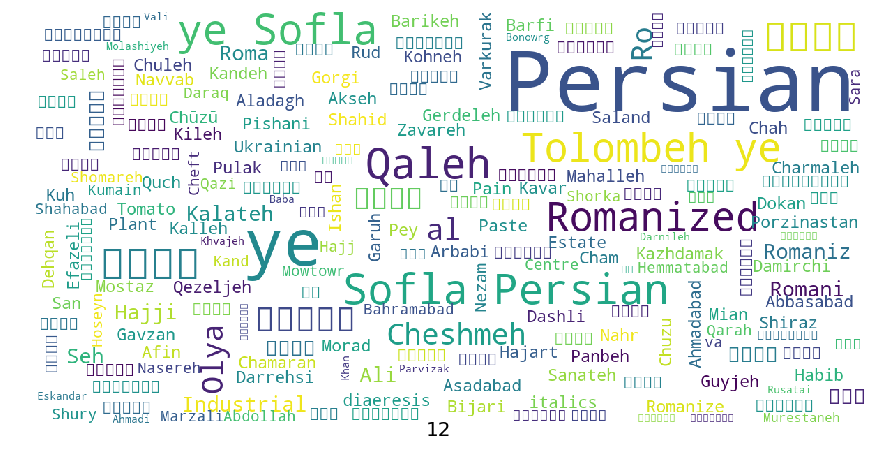

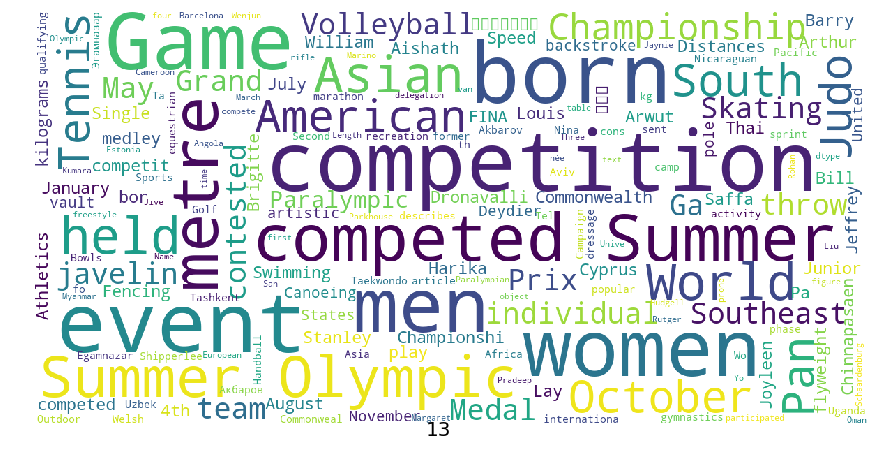

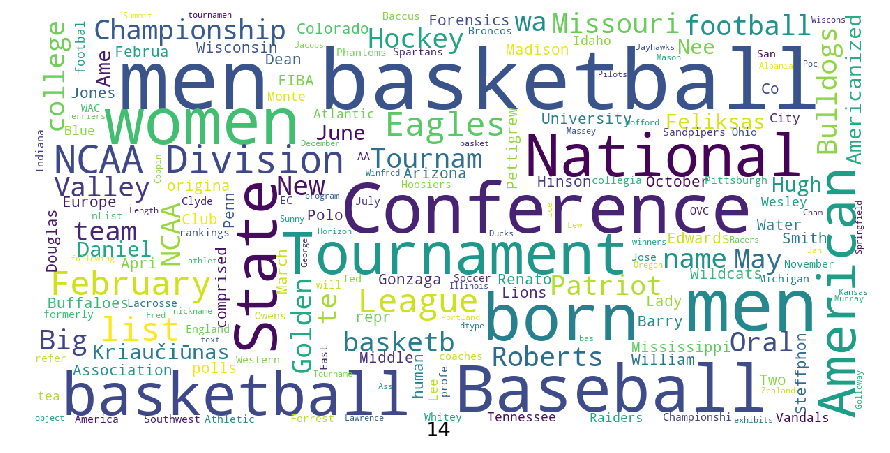

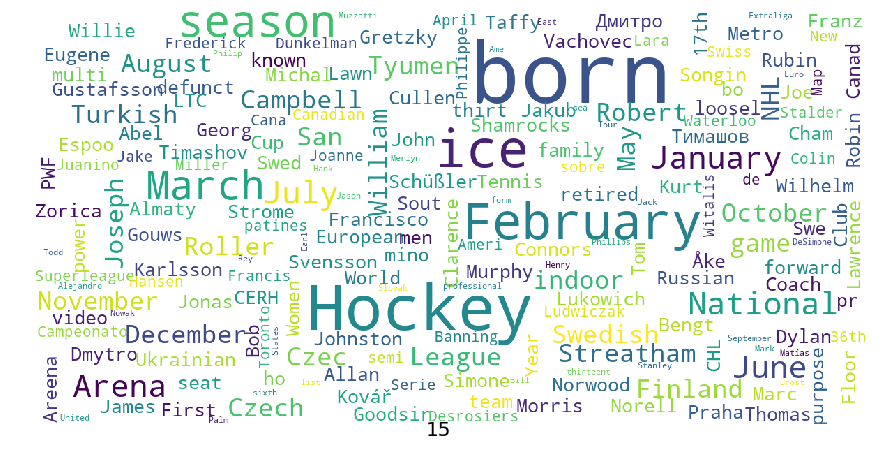

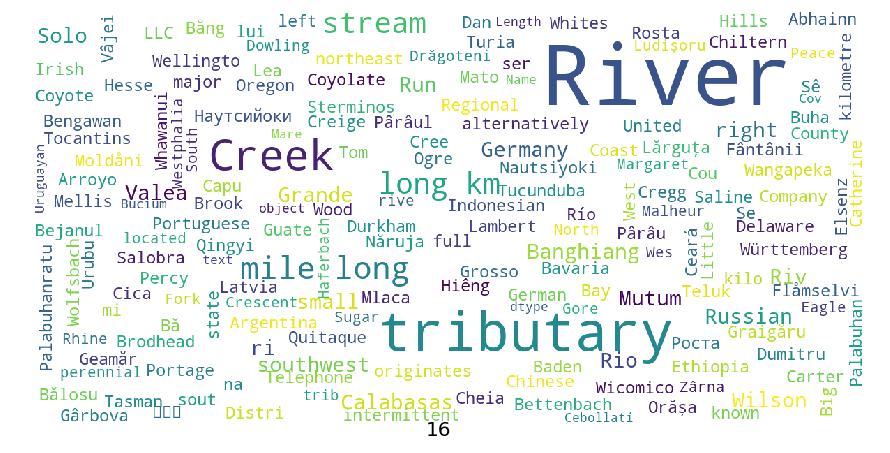

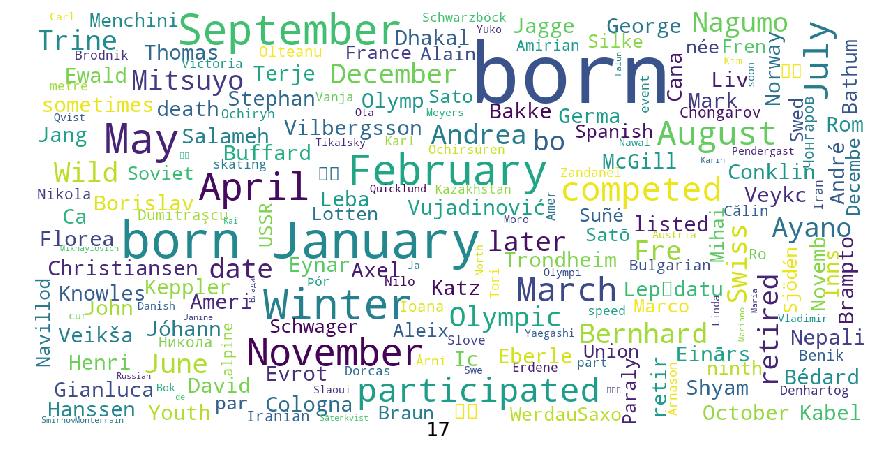

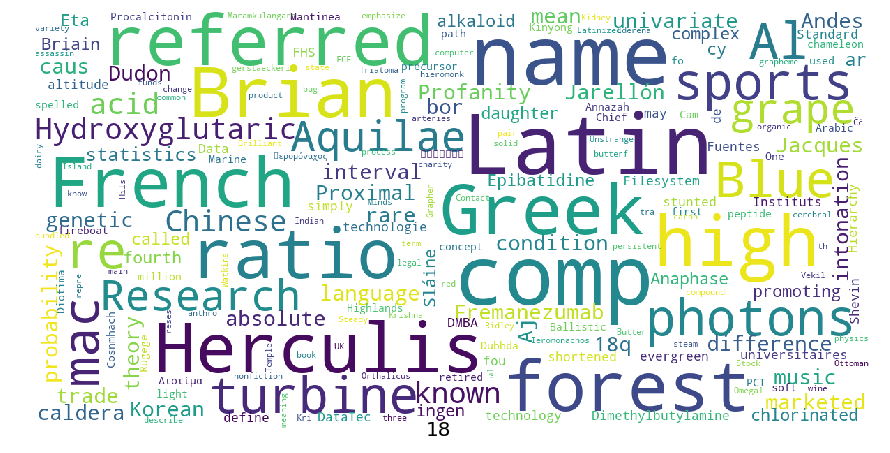

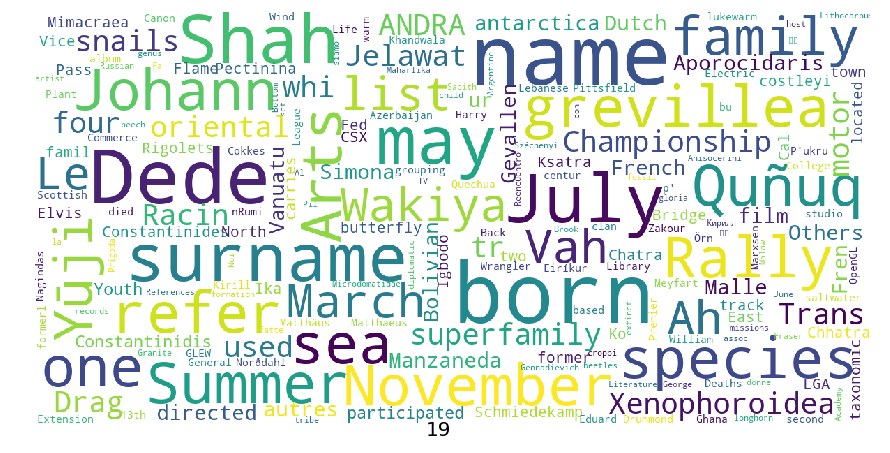

In [7]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(15, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

#userinput = input()
#show_wordcloud(new_df[kmeans.labels_ == kmeans.predict(vectorizer.transform([userinput]))[0]])
for i in range(20):
    show_wordcloud(new_df[kmeans.labels_ == i]['text'],str(i))

In [11]:
import joblib

joblib.dump(kmeans, 'wikikmeans.joblib')
dkmeans = joblib.load('wikikmeans.joblib')

In [8]:
import pickle
s = pickle.dumps(kmeans)
lkmeans = pickle.loads(s)

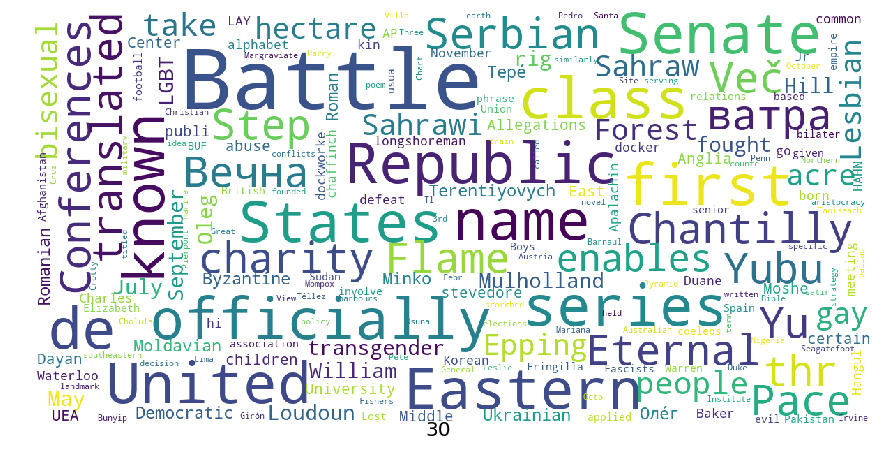

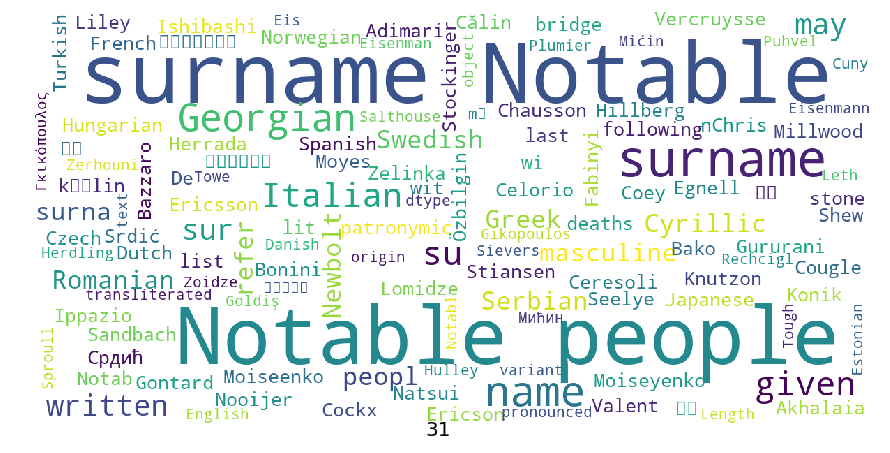

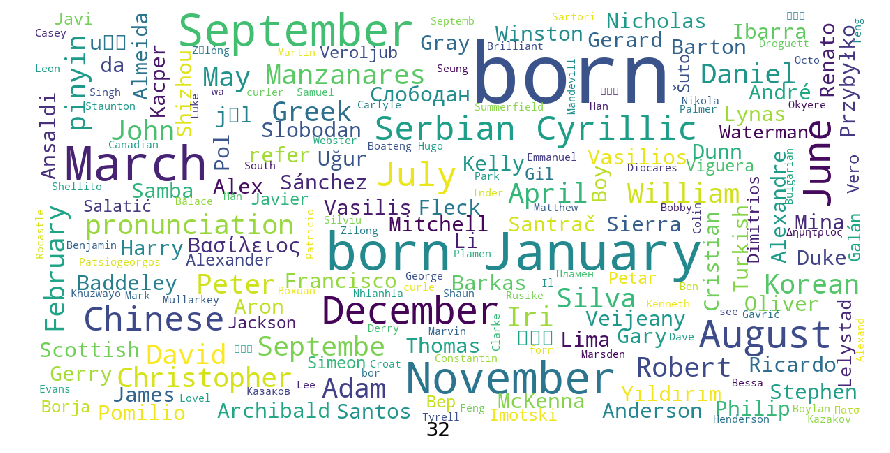

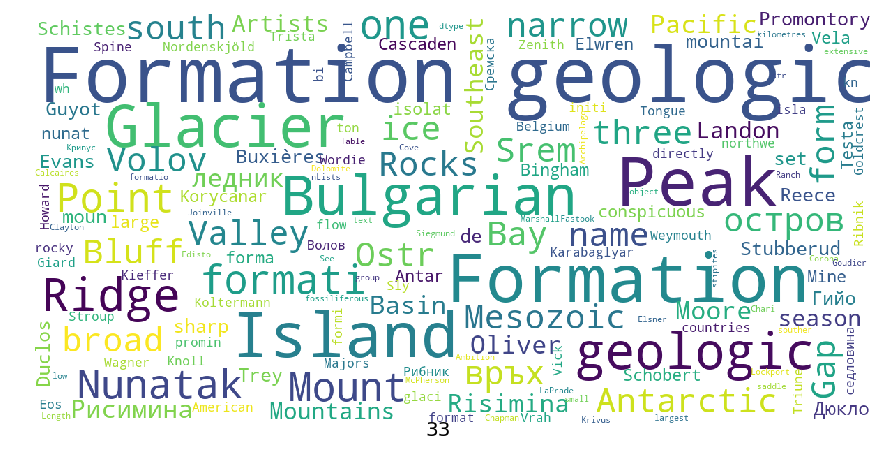

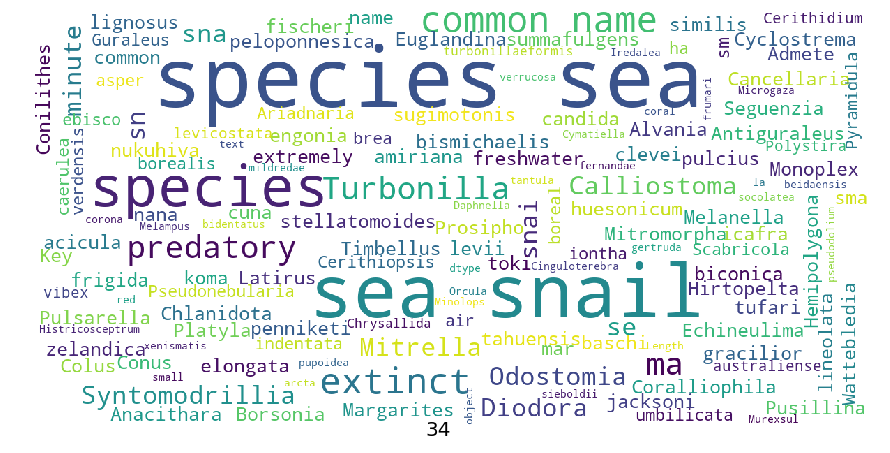

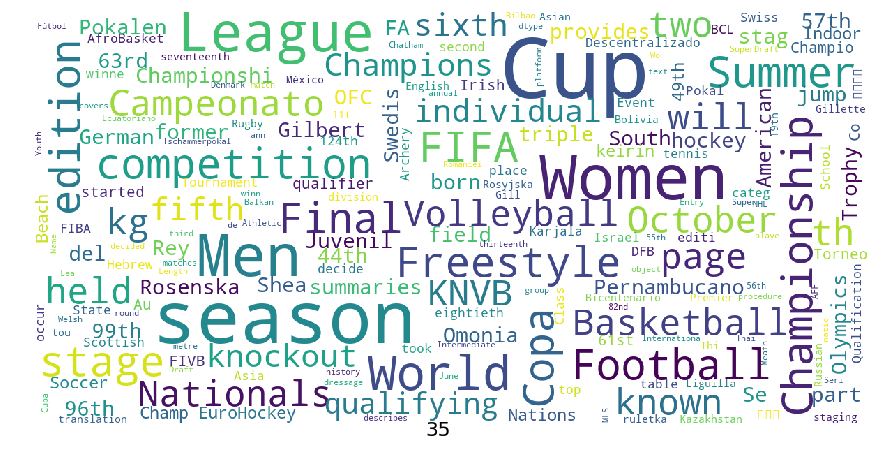

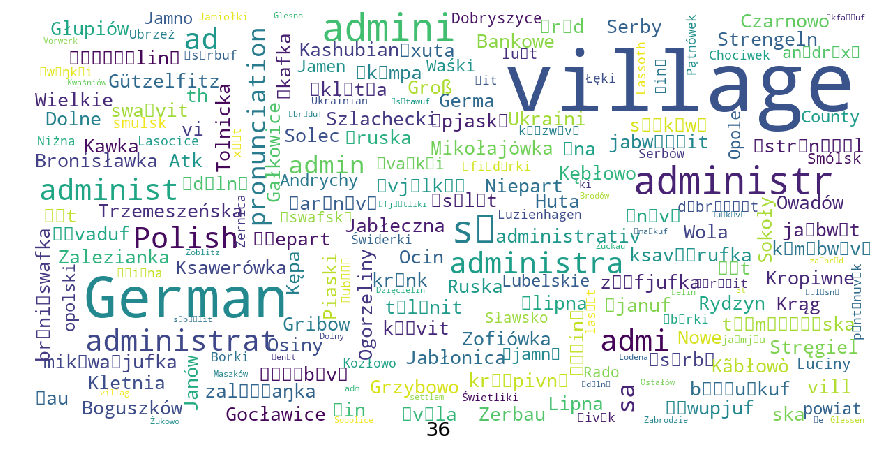

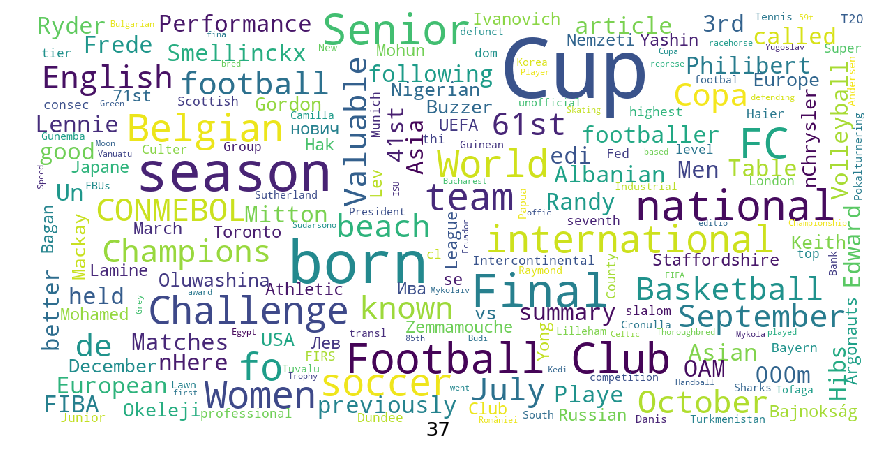

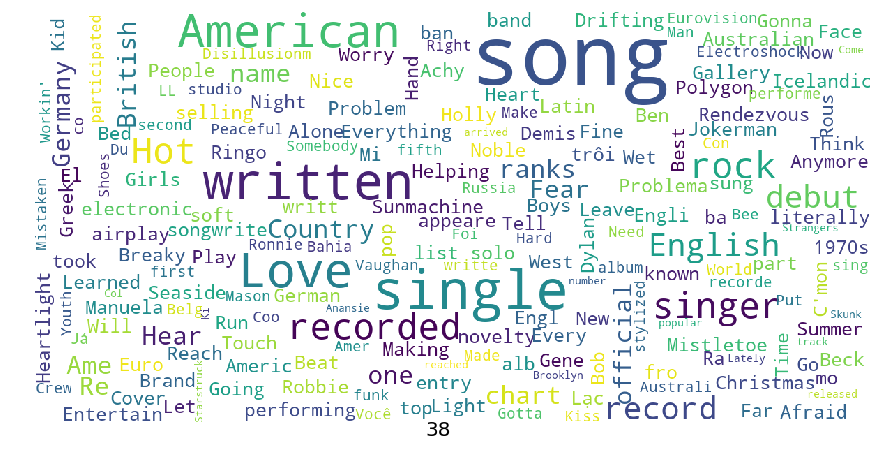

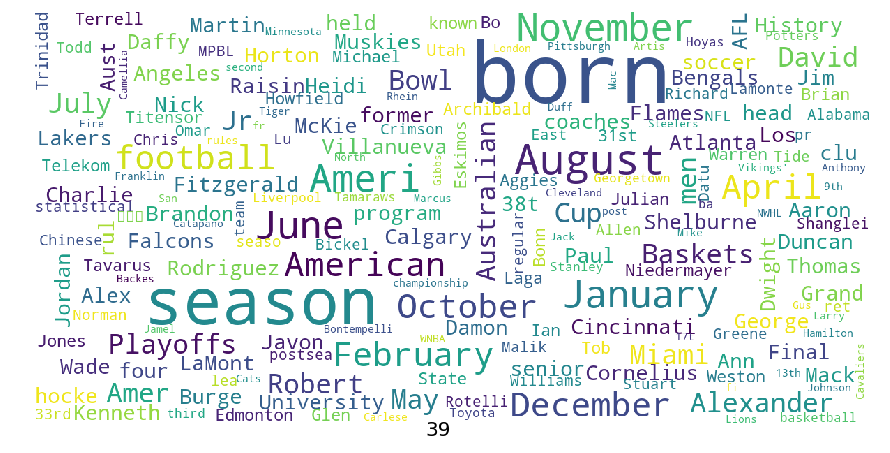

In [12]:
for i in range(30,40):
    show_wordcloud(new_df[dkmeans.labels_ == i]['text'],str(i))